One of the new functionalities I added in ArviZ during my GSoC internship is Leave One Out (LOO) Probability Integral Transform (PIT) posterior predictive checks. You can see [two](https://arviz-devs.github.io/arviz/examples/plot_loo_pit_ecdf.html) [examples](https://arviz-devs.github.io/arviz/examples/plot_loo_pit_overlay.html) of its usage in the example gallery and also some examples in its [API section](https://arviz-devs.github.io/arviz/generated/arviz.plot_loo_pit.html#arviz.plot_loo_pit). However, these examples are mainly related to the usage of the functionalities, not so much on the usage of LOO-PIT itself nor its interpretability.

I feel that the LOO-PIT algorithm usage and interpretability needs a short summary with examples showing the most common issues found checking models with LOO-PIT. This tutorial will tackle this issue: how can LOO-PIT be used for model checking and what does it tell us in a practical manner, so we can see firsthand how wrongly specified models cause LOO-PIT values to differ from a uniform distribution. For information on what exactly is LOO-PIT doing see:

* Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., and Rubin, D. B. (2013). Bayesian Data Analysis. Chapman & Hall/CRC Press, London, third edition. (p. 152--153)

## LOO-PIT vs posterior predictive checks

In [1]:
import pymc3 as pm
import numpy as np
import arviz as az 
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
plt.style.use('../forty_blog.mplstyle')

In [3]:
N_obs = 70
data_normal = np.random.normal(loc=-2, scale=3, size=N_obs)
a0, a1 = 1.7, -1
sigma = 2.2
data_x_regression = np.linspace(0, 10, N_obs)
data_y_regression = np.random.normal(loc=a1*data_x_regression+a0, scale=sigma)

LOO-PIT performs marginal posterior predictive checks, whereas generally, posterior predictive checks are done taking into account all observations at a time. There are many cases where it makes sense to combine all observations toghether, in some other cases some rescaling may be needed and there can even be cases where combining there is no way of combining the observations.

Here, we will experiment with LOO-PIT using two different models, from the two first classes. First an estimation of the mean and standard deviation of a 1D normal variable, and then a linear regression.

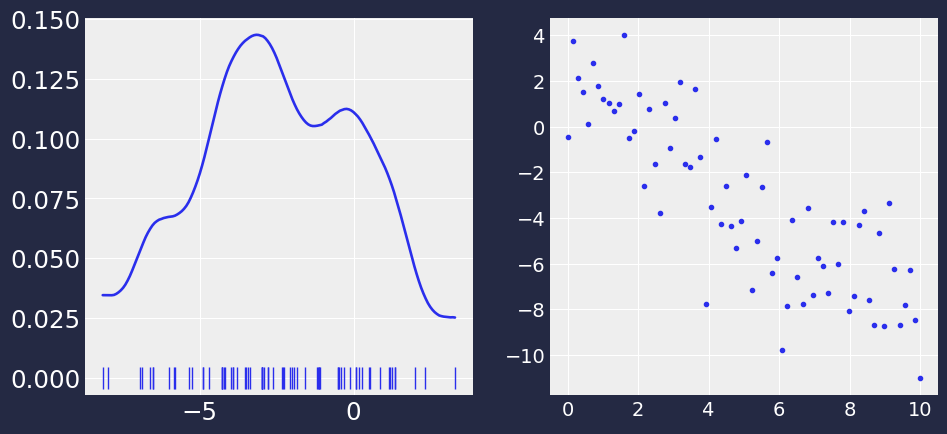

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))
az.plot_dist(data_normal, rug=True, ax=ax[0], rug_kwargs={"space": 0});
ax[1].plot(data_x_regression, data_y_regression, ".");